<a href="https://colab.research.google.com/github/mattheweisenberg6/MAT421/blob/main/ModuleG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**21.4 Simpson's Rule**

If we consider the two intervals [x_i-1, x_i] and [x_i,x_i+1], we can utilize Simpson's rule to approximate the area under f(x) within these two intervals by utilizing a quadratic polynomial through the points (x_i-1, f(x_i-1)),(x_i,(f(x_i))). We can utilize Langrange polynomials to construct this polynomial for the rule. Using these polynomials with algebraic manipulation, we get an integral for these two intervals over P_i(x). In order to use Simpson's rule, we must also make sure we have an even number of intervals, which means an odd number of grid points.

In [1]:
#We can use Python libraries to calculate Simpson's Rule

import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


**21.5 Computing Integrals in Python**

We can use the **scipy.integrate** library to generate multiple methods for calculating integrals in Python. We can accomplish these approximations via the **trapz** function.


In [13]:
#We can use these tools to approximate the integral from 0 to pi for sin(x)dx over 11 equally spaced points in the interval


import numpy as np
from scipy.integrate import trapezoid

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapezoid(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


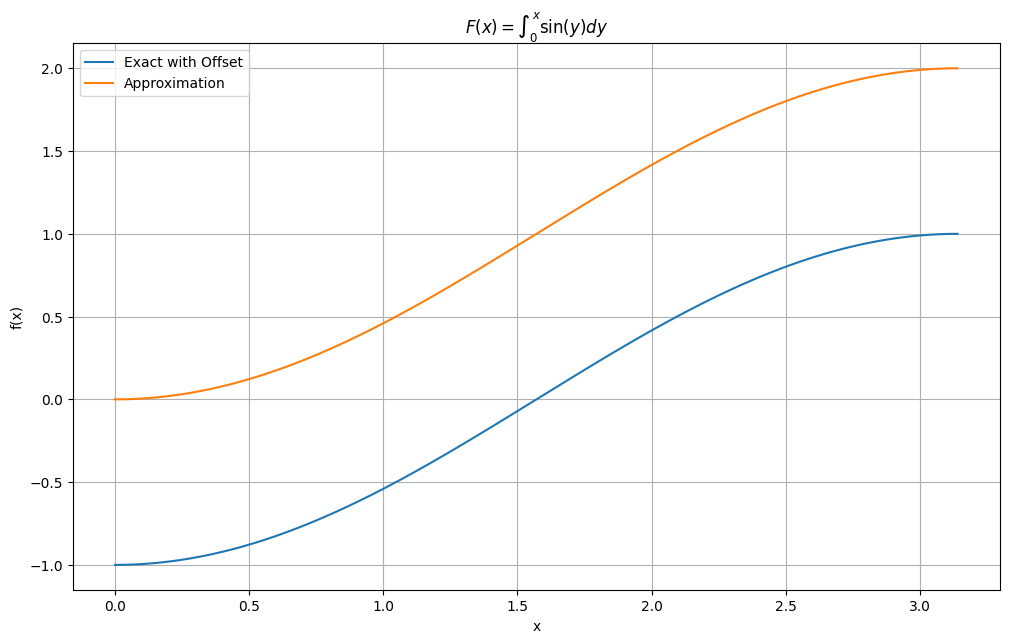

In [19]:
#We can use the cumtrapz function to calculate the cummulative integral of a function over an interval

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid as cumtrapz

# Ensure matplotlib inline for Jupyter Notebook
%matplotlib inline

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x, initial=0)  # Adding initial condition

plt.figure(figsize=(10,6))
plt.plot(x, F_exact, label="Exact with Offset")
plt.plot(x, F_approx, label="Approximation")
plt.grid()
plt.tight_layout()
plt.title(r'$F(x) = \int_0^{x} \sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


In [20]:
#Lastly, we can use the quad() function which integrates the function f from a to b
#We can use it to integrate sin(x)dx on the interval 0 to pi and compare it to the correct answer of 2.0

from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
